# Problem Statement

Business Problem:

We all know that blood is really important for health care. We have seen many blood donation camps and almost all of us have helped them to raise blood in the blood bank.

A blood unit has a shelf life of 42 days only, that means if blood is not used within 42 days then it will be a waste, also shortage of the blood also increases many risky situations; hence, hospitals always have this problem in hand.” How much blood do they have to store..?”


Agenda for Day 1

Let's explore the data in reference to following hypothesis

Is there a variation in the blood requirement for a specific month ?? Is this variation same for all blood types
Has the above mentioned pattern changed over a period of time for all blood types
Can average be considered as a good statistical measure to guesstimate the future requirement for different blood types
Is there a consistent increase/decrease in the usage pattern for all blood types. Is this pattern additive or multiplicative.


Agenda for Day 2

Build various exponential smoothing models ,regression, naïve forecast models, simple average models etc. on the training data using multiple parameters  and check the performance on the test data using RMSE.

What are the pre-processing steps required for the given dataset (like imputation of missing values, check if the data is stationary or not etc.)
Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.   
Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE .
 Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.  

# 1. Read the data as an appropriate Time Series data and plot the data.

## Importing Libraries, Reading the dataset

In [1]:
##Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pylab import rcParams

In [2]:
df = pd.read_csv('c:/GL Class/Industry Session/30th Oct, 2021/Data.csv')

In [3]:
df.shape

(171, 7)

In [4]:
df.head()

,YearMonth,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-
0,2005-01,1264.0,182,1525,159,156.0,24
1,2005-02,1167.0,172,1427,153,152.0,26
2,2005-03,1881.0,242,2149,223,219.0,31
3,2005-04,1293.0,177,1557,164,163.0,25
4,2005-05,1059.0,158,1314,142,132.0,28


In [5]:
df.tail()

,YearMonth,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-
166,2018-11,3816.0,431,4076,423,418.0,51
167,2018-12,5992.0,646,6253,633,631.0,77
168,2019-01,781.0,125,1047,120,108.0,17
169,2019-02,1537.0,206,1799,193,182.0,29
170,2019-03,1297.0,186,1557,166,166.0,31


Data refers from Jan 2005 to March 2019.  It’’s a monthly Blood Consumption data. Creating monthly dates for timestamp from Jan 2005 to March 2019.

In [6]:
date = pd.date_range(start='01/2005', end='04/2019', freq='M')
date

DatetimeIndex(['2005-01-31', '2005-02-28', '2005-03-31', '2005-04-30',
               '2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31',
               ...
               '2018-06-30', '2018-07-31', '2018-08-31', '2018-09-30',
               '2018-10-31', '2018-11-30', '2018-12-31', '2019-01-31',
               '2019-02-28', '2019-03-31'],
              dtype='datetime64[ns]', length=171, freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Date'])
df.head()
df.tail()

,YearMonth,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-,Time_Stamp
166,2018-11,3816.0,431,4076,423,418.0,51,2018-11-30
167,2018-12,5992.0,646,6253,633,631.0,77,2018-12-31
168,2019-01,781.0,125,1047,120,108.0,17,2019-01-31
169,2019-02,1537.0,206,1799,193,182.0,29,2019-02-28
170,2019-03,1297.0,186,1557,166,166.0,31,2019-03-31


In [8]:
df = df.set_index('Time_Stamp')
df.head()

,YearMonth,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-
Time_Stamp,,,,,,,
2005-01-31,2005-01,1264.0,182,1525,159,156.0,24
2005-02-28,2005-02,1167.0,172,1427,153,152.0,26
2005-03-31,2005-03,1881.0,242,2149,223,219.0,31
2005-04-30,2005-04,1293.0,177,1557,164,163.0,25
2005-05-31,2005-05,1059.0,158,1314,142,132.0,28


In [9]:
df.drop(['YearMonth'], axis=1, inplace=True)
df.head()

,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-
Time_Stamp,,,,,,
2005-01-31,1264.0,182,1525,159,156.0,24
2005-02-28,1167.0,172,1427,153,152.0,26
2005-03-31,1881.0,242,2149,223,219.0,31
2005-04-30,1293.0,177,1557,164,163.0,25
2005-05-31,1059.0,158,1314,142,132.0,28


In [10]:
df.describe()

,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-
count,169.000000,171.000000,171.000000,171.00000,170.000000,171.000000
mean,1977.568047,251.742690,2254.678363,235.51462,231.588235,33.339181
std,1293.479958,130.093692,1303.793513,130.61850,129.957689,13.444073
min,767.000000,124.000000,1018.000000,108.00000,108.000000,17.000000
25%,1174.000000,171.000000,1437.500000,153.50000,148.250000,25.000000
50%,1447.000000,198.000000,1728.000000,183.00000,178.000000,29.000000
75%,2105.000000,265.500000,2394.000000,251.00000,245.250000,36.000000
max,6824.000000,732.000000,7089.000000,724.00000,714.000000,79.000000


Coefficient of variation (CV=standard deviation / mean).As a rule of thumb, a CV >= 1 indicates a relatively high variation, while a CV < 1 can be considered low. This means that distributions with a coefficient of variation higher than 1 are considered to be high variance whereas those with a CV lower than 1 are considered to be low-variance. 

CV= std/mean and hence for the given data for all Blood Groups value is < 1 . So variation is considered low.

For all Blood Groups, huge difference is observed between minimum and maximum values, hence range is high. This could be because of seasonality and/or trend.


Blood Group A+ has 2 Null Values and Blood Group o+ has one null value. The same would be imputed appropriately

## Plotting the time-series

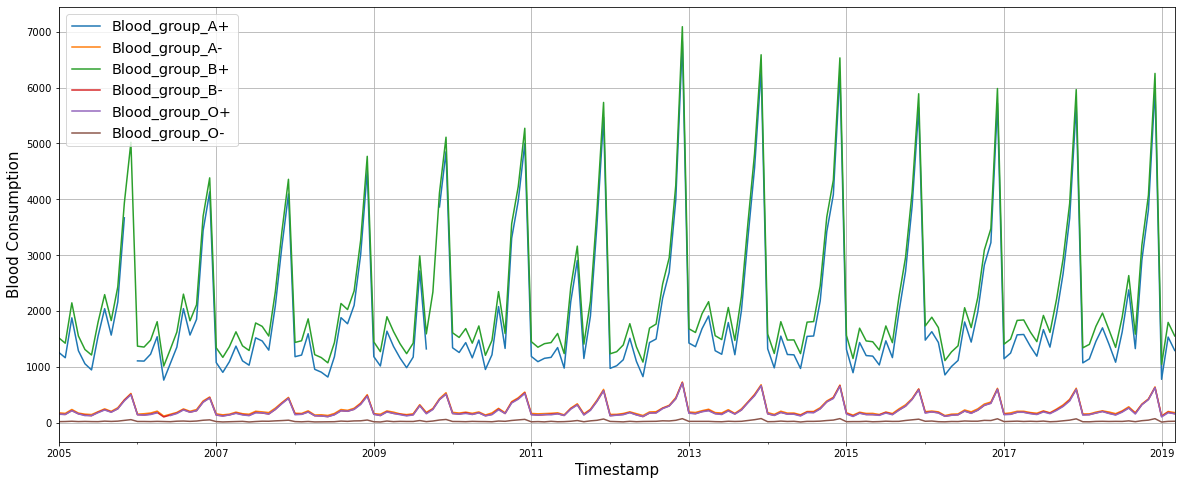

In [11]:
#Plotting the time-series
df.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

1) There seems to be a trend with a seasonality as well for all Blood Groups
2) Usage of Blood Group A+ and B+ is quite high and hence trends for other blood group is not clearly visible.
3) Consumption Pattern for A+ and B+ is quite similar.. Is this true for A- and B- as well.. Let's check it


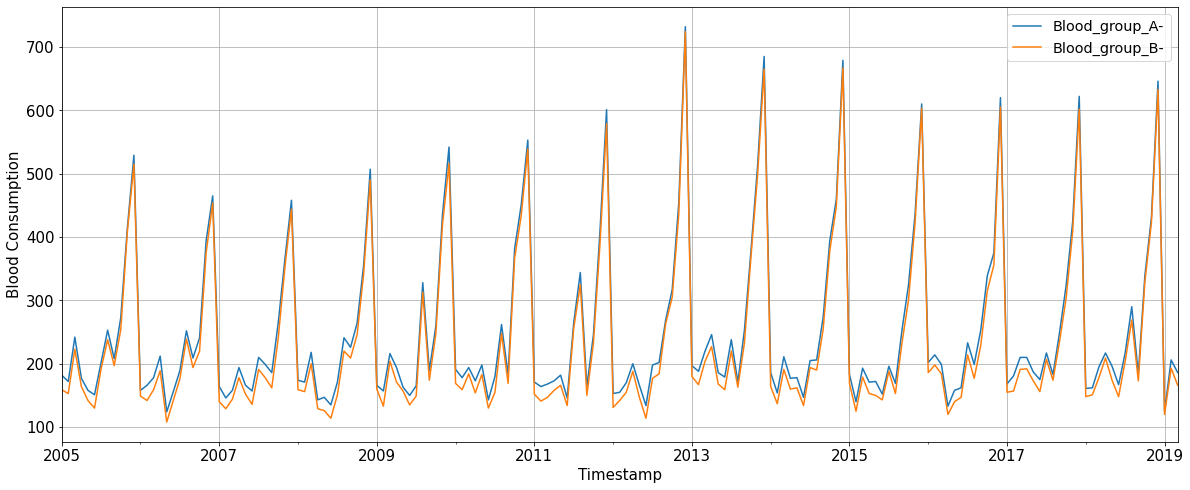

In [12]:
#Plotting the time-series
df[['Blood_group_A-','Blood_group_B-']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

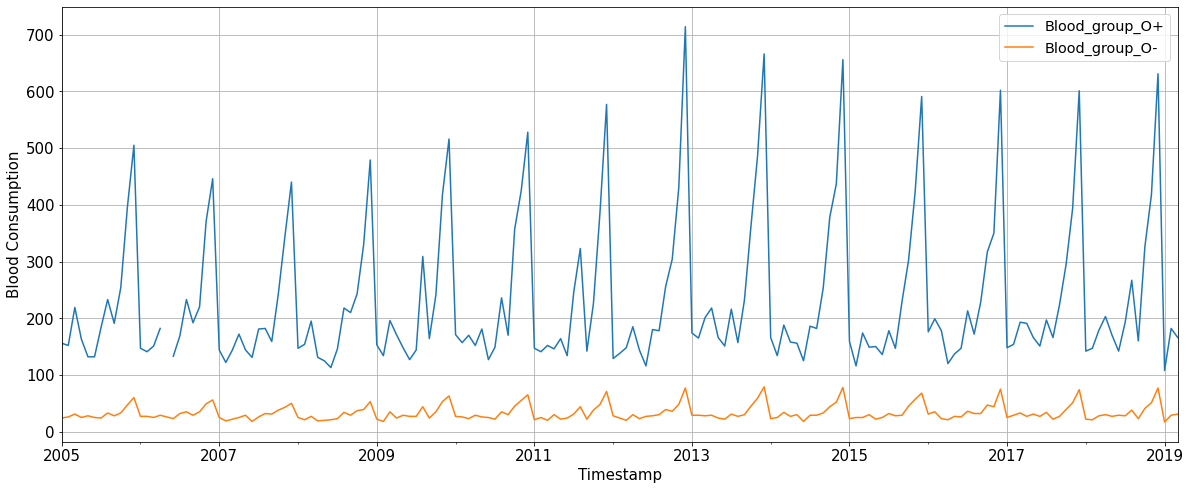

In [13]:
#Plotting the time-series
df[['Blood_group_O+','Blood_group_O-']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Blood Group O+ and Blood Group O- pattern is quite similar , however the consumption values are quite different.

## Checking for missing values

In [14]:
df.isnull().sum()

Blood_group_A+    2
Blood_group_A-    0
Blood_group_B+    0
Blood_group_B-    0
Blood_group_O+    1
Blood_group_O-    0
dtype: int64

In [15]:
# imputing using the Rolling Mean, Liner Interpolation, Time Interpolation, Cubic Interpolation and Quadratic Interpolation
df = df.assign(RollingMean=df['Blood_group_A+'].fillna(df['Blood_group_A+'].rolling(24,min_periods=1,).mean()))
df = df.assign(InterpolateLinear=df['Blood_group_A+'].interpolate(method='linear'))
df = df.assign(InterpolateTime=df['Blood_group_A+'].interpolate(method='time'))
df = df.assign(InterpolateCubic=df['Blood_group_A+'].interpolate(method='cubic'))
df = df.assign(InterpolateQuadratic=df['Blood_group_A+'].interpolate(method='quadratic'))
df.head(20)

,Blood_group_A+,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-,RollingMean,InterpolateLinear,InterpolateTime,InterpolateCubic,InterpolateQuadratic
Time_Stamp,,,,,,,,,,,
2005-01-31,1264.0,182,1525,159,156.0,24,1264.000000,1264.0,1264.0,1264.000000,1264.000000
2005-02-28,1167.0,172,1427,153,152.0,26,1167.000000,1167.0,1167.0,1167.000000,1167.000000
2005-03-31,1881.0,242,2149,223,219.0,31,1881.000000,1881.0,1881.0,1881.000000,1881.000000
2005-04-30,1293.0,177,1557,164,163.0,25,1293.000000,1293.0,1293.0,1293.000000,1293.000000
2005-05-31,1059.0,158,1314,142,132.0,28,1059.000000,1059.0,1059.0,1059.000000,1059.000000
2005-06-30,949.0,151,1216,130,132.0,25,949.000000,949.0,949.0,949.000000,949.000000
2005-07-31,1555.0,202,1806,192,184.0,24,1555.000000,1555.0,1555.0,1555.000000,1555.000000
2005-08-31,2045.0,253,2296,238,233.0,33,2045.000000,2045.0,2045.0,2045.000000,2045.000000
2005-09-30,1572.0,208,1832,197,191.0,28,1572.000000,1572.0,1572.0,1572.000000,1572.000000


Similar result for all techniques.. EVen the below plot also displays the same behaviour.

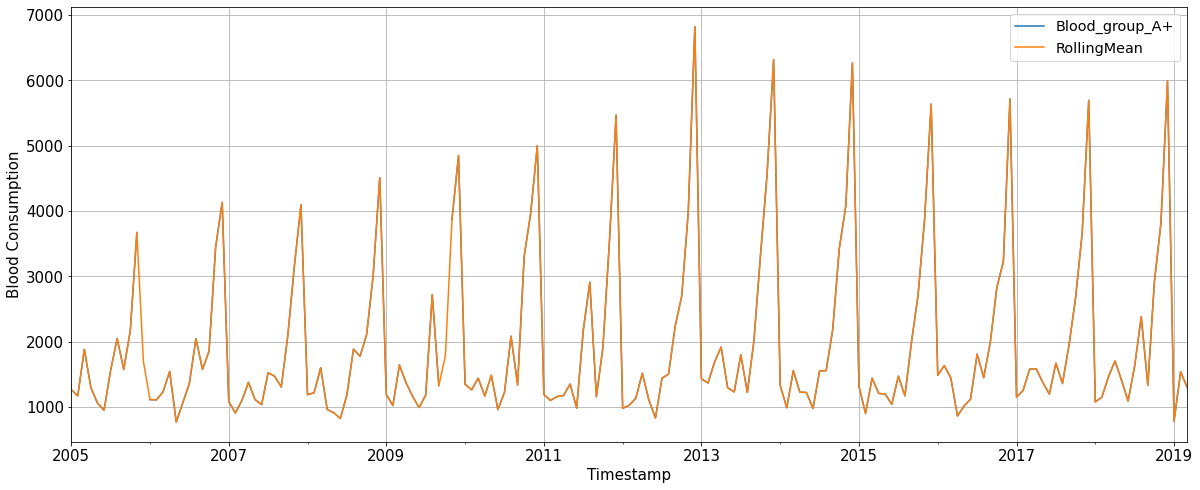

In [16]:
df[['Blood_group_A+','RollingMean']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

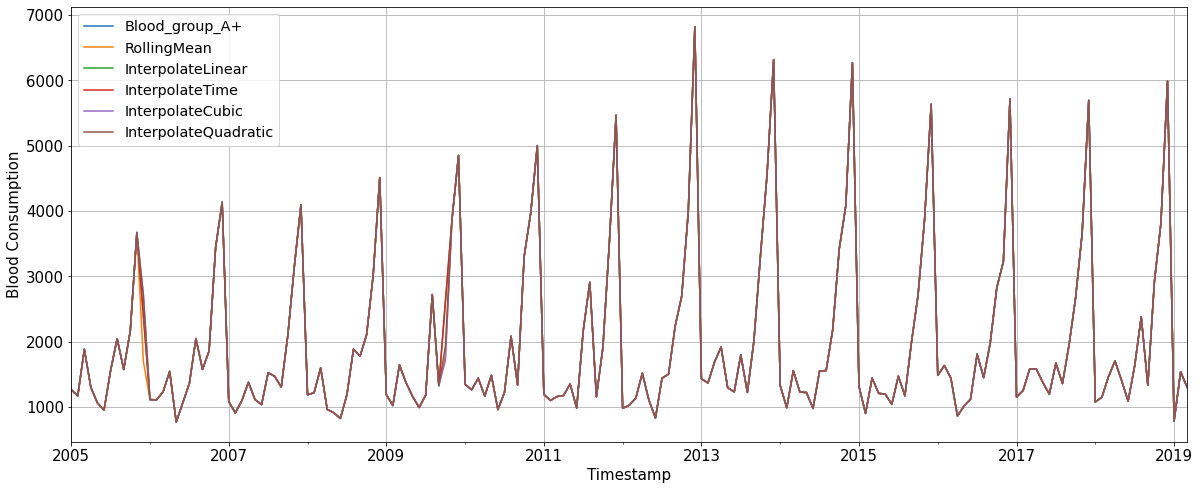

In [17]:
df[['Blood_group_A+','RollingMean','InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [18]:
#Imputing missing values as rolling mean
df.drop(['Blood_group_A+'],axis=1,inplace=True)
df.rename(columns={'RollingMean': 'Blood_group_A+'}, inplace = True)
df.head()

,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-,Blood_group_A+,InterpolateLinear,InterpolateTime,InterpolateCubic,InterpolateQuadratic
Time_Stamp,,,,,,,,,,
2005-01-31,182,1525,159,156.0,24,1264.0,1264.0,1264.0,1264.0,1264.0
2005-02-28,172,1427,153,152.0,26,1167.0,1167.0,1167.0,1167.0,1167.0
2005-03-31,242,2149,223,219.0,31,1881.0,1881.0,1881.0,1881.0,1881.0
2005-04-30,177,1557,164,163.0,25,1293.0,1293.0,1293.0,1293.0,1293.0
2005-05-31,158,1314,142,132.0,28,1059.0,1059.0,1059.0,1059.0,1059.0


In [19]:
df.drop(['InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic'],axis=1,inplace=True)


In [20]:
df.head()

,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-,Blood_group_A+
Time_Stamp,,,,,,
2005-01-31,182,1525,159,156.0,24,1264.0
2005-02-28,172,1427,153,152.0,26,1167.0
2005-03-31,242,2149,223,219.0,31,1881.0
2005-04-30,177,1557,164,163.0,25,1293.0
2005-05-31,158,1314,142,132.0,28,1059.0


In [21]:
# imputing using the Rolling Mean, Liner Interpolation, Time Interpolation, Cubic Interpolation and Quadratic Interpolation
df = df.assign(RollingMean=df['Blood_group_O+'].fillna(df['Blood_group_O+'].rolling(24,min_periods=1,).mean()))
df = df.assign(InterpolateLinear=df['Blood_group_O+'].interpolate(method='linear'))
df = df.assign(InterpolateTime=df['Blood_group_O+'].interpolate(method='time'))
df = df.assign(InterpolateCubic=df['Blood_group_O+'].interpolate(method='cubic'))
df = df.assign(InterpolateQuadratic=df['Blood_group_O+'].interpolate(method='quadratic'))
df.head(20)

,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O+,Blood_group_O-,Blood_group_A+,RollingMean,InterpolateLinear,InterpolateTime,InterpolateCubic,InterpolateQuadratic
Time_Stamp,,,,,,,,,,,
2005-01-31,182,1525,159,156.0,24,1264.000000,156.0000,156.0,156.000000,156.000000,156.000000
2005-02-28,172,1427,153,152.0,26,1167.000000,152.0000,152.0,152.000000,152.000000,152.000000
2005-03-31,242,2149,223,219.0,31,1881.000000,219.0000,219.0,219.000000,219.000000,219.000000
2005-04-30,177,1557,164,163.0,25,1293.000000,163.0000,163.0,163.000000,163.000000,163.000000
2005-05-31,158,1314,142,132.0,28,1059.000000,132.0000,132.0,132.000000,132.000000,132.000000
2005-06-30,151,1216,130,132.0,25,949.000000,132.0000,132.0,132.000000,132.000000,132.000000
2005-07-31,202,1806,192,184.0,24,1555.000000,184.0000,184.0,184.000000,184.000000,184.000000
2005-08-31,253,2296,238,233.0,33,2045.000000,233.0000,233.0,233.000000,233.000000,233.000000
2005-09-30,208,1832,197,191.0,28,1572.000000,191.0000,191.0,191.000000,191.000000,191.000000


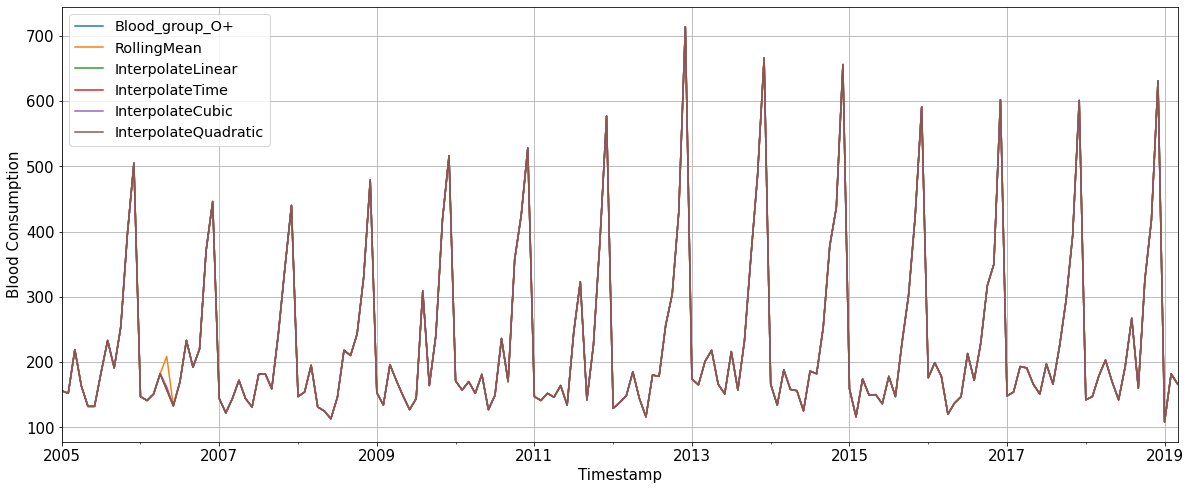

In [22]:
df[['Blood_group_O+','RollingMean','InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic']].plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

In [23]:
#Imputing missing values as rolling mean
df.drop(['Blood_group_O+'],axis=1,inplace=True)
df.rename(columns={'RollingMean': 'Blood_group_O+'}, inplace = True)
df.head()

,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O-,Blood_group_A+,Blood_group_O+,InterpolateLinear,InterpolateTime,InterpolateCubic,InterpolateQuadratic
Time_Stamp,,,,,,,,,,
2005-01-31,182,1525,159,24,1264.0,156.0,156.0,156.0,156.0,156.0
2005-02-28,172,1427,153,26,1167.0,152.0,152.0,152.0,152.0,152.0
2005-03-31,242,2149,223,31,1881.0,219.0,219.0,219.0,219.0,219.0
2005-04-30,177,1557,164,25,1293.0,163.0,163.0,163.0,163.0,163.0
2005-05-31,158,1314,142,28,1059.0,132.0,132.0,132.0,132.0,132.0


In [24]:
df.drop(['InterpolateLinear','InterpolateTime','InterpolateCubic','InterpolateQuadratic'],axis=1,inplace=True)

In [25]:
df.head()

,Blood_group_A-,Blood_group_B+,Blood_group_B-,Blood_group_O-,Blood_group_A+,Blood_group_O+
Time_Stamp,,,,,,
2005-01-31,182,1525,159,24,1264.0,156.0
2005-02-28,172,1427,153,26,1167.0,152.0
2005-03-31,242,2149,223,31,1881.0,219.0
2005-04-30,177,1557,164,25,1293.0,163.0
2005-05-31,158,1314,142,28,1059.0,132.0


In [26]:
df.isnull().sum()

Blood_group_A-    0
Blood_group_B+    0
Blood_group_B-    0
Blood_group_O-    0
Blood_group_A+    0
Blood_group_O+    0
dtype: int64

## Plotting the final data

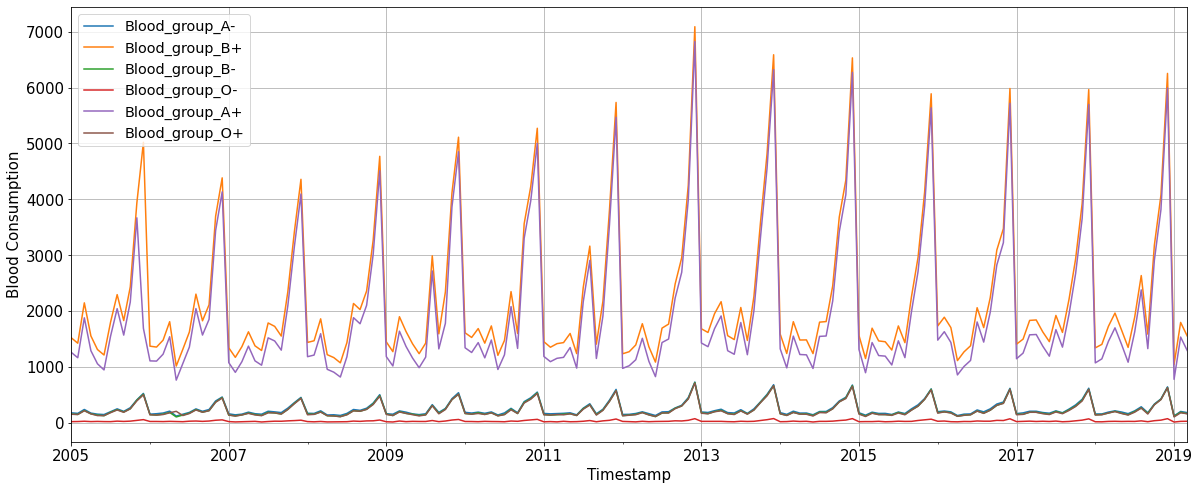

In [27]:
#Plotting the time-series
df.plot(figsize=(20,8))
plt.grid();
plt.xlabel('Timestamp',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [28]:
df_sub=df[['Blood_group_A-']] ## Performing EDA for one of the Blood Group
df_sub.head()

,Blood_group_A-
Time_Stamp,
2005-01-31,182
2005-02-28,172
2005-03-31,242
2005-04-30,177
2005-05-31,158


## Yearly Boxplot

No handles with labels found to put in legend.


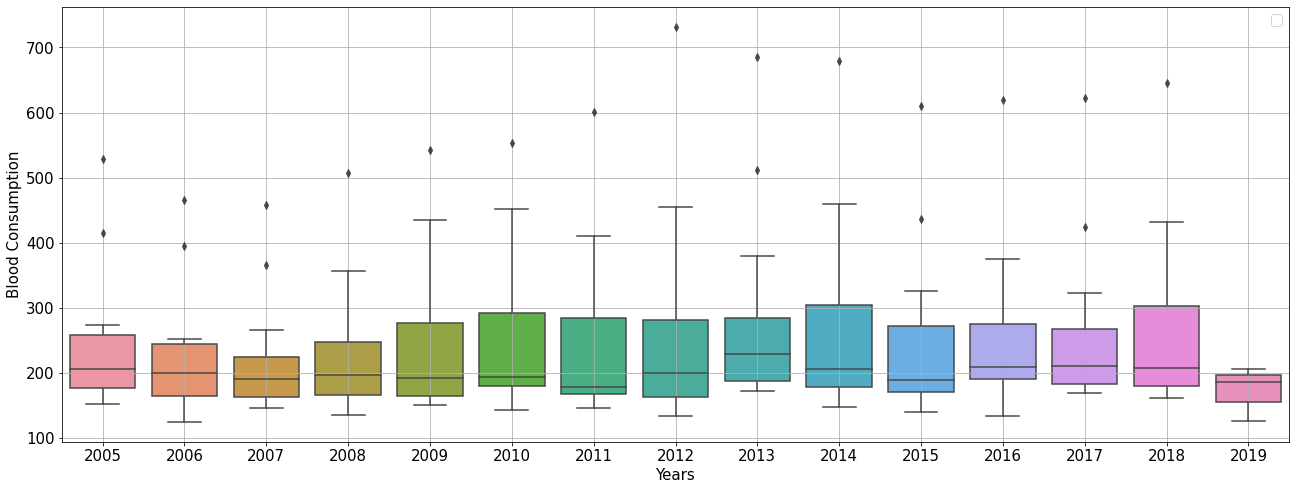

In [29]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_sub.index.year,y = df.values[:,0],ax=ax)
plt.grid();
plt.xlabel('Years',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

Above plot suggests that series does not have a significant trend. However seasonality is clearly visible across all years.

Also, we see that the Blood Consumption has some outliers/extreme values for multiple years



## Monthly Boxplot

No handles with labels found to put in legend.


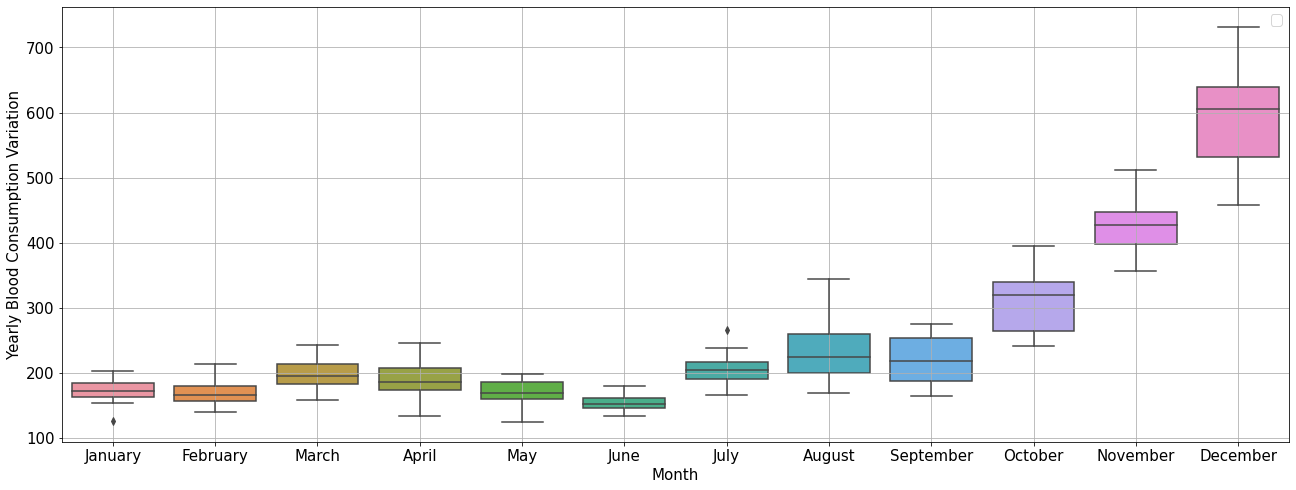

In [30]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df_sub.index.month_name(),y = df.values[:,0],ax=ax)

plt.grid();
plt.xlabel('Month',fontsize=15)
plt.ylabel('Yearly Blood Consumption Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

It appears that we have a huge seasonal component each year. 

Last quarter of every year records very high consumption.

Only one extreme value each for the month of Jan and July


## Monthly Consumption across years

In [31]:
monthly_BloodC_across_years = pd.pivot_table(df_sub, values = 'Blood_group_A-', columns = df_sub.index.month_name(), index = df_sub.index.year)
monthly_BloodC_across_years

Time_Stamp,April,August,December,February,January,July,June,March,May,November,October,September
Time_Stamp,,,,,,,,,,,,
2005,177.0,253.0,529.0,172.0,182.0,202.0,151.0,242.0,158.0,414.0,273.0,208.0
2006,212.0,252.0,465.0,166.0,158.0,189.0,156.0,178.0,124.0,394.0,241.0,209.0
2007,194.0,199.0,458.0,146.0,164.0,210.0,157.0,158.0,166.0,365.0,266.0,186.0
2008,143.0,241.0,507.0,171.0,174.0,171.0,135.0,218.0,147.0,356.0,264.0,226.0
2009,194.0,328.0,542.0,157.0,166.0,165.0,150.0,216.0,163.0,435.0,260.0,189.0
2010,173.0,262.0,553.0,178.0,191.0,180.0,143.0,194.0,198.0,451.0,382.0,183.0
2011,173.0,344.0,601.0,164.0,171.0,265.0,146.0,168.0,182.0,410.0,246.0,164.0
2012,200.0,202.0,732.0,155.0,153.0,198.0,134.0,170.0,166.0,454.0,317.0,269.0
2013,246.0,171.0,685.0,188.0,197.0,238.0,179.0,220.0,186.0,512.0,379.0,253.0


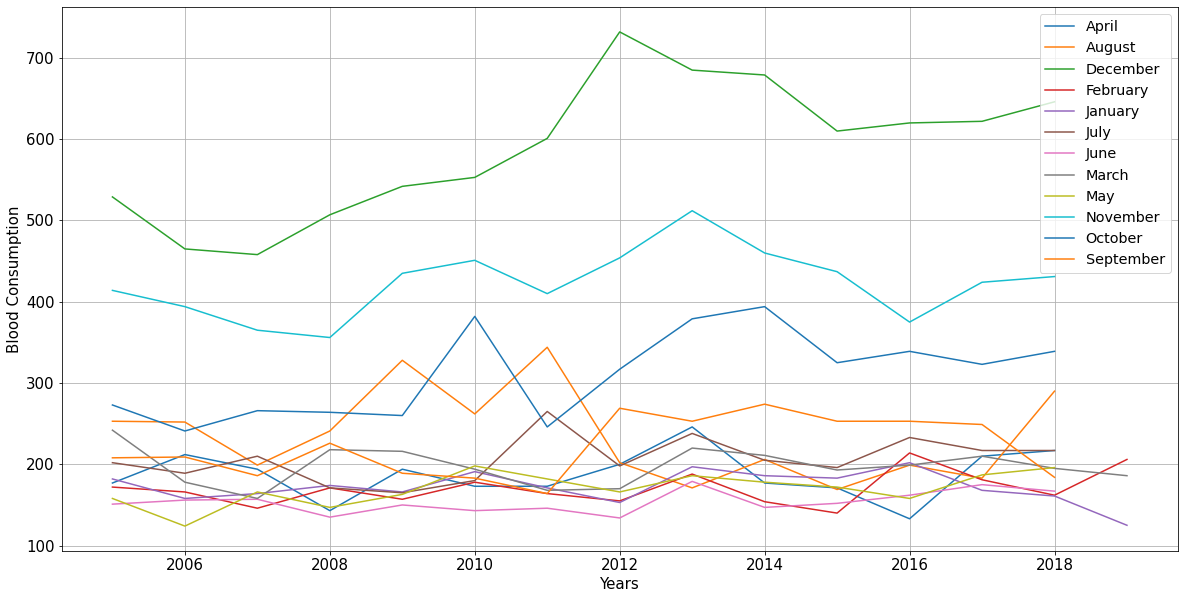

In [32]:
monthly_BloodC_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');
plt.xlabel('Years',fontsize=15)
plt.ylabel('Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

December has highest Consumption across all the years.
Every month has a different trend across all years


## Quarterly Consumption across years

In [33]:
quarterly_BloodC = pd.pivot_table(df_sub, values = "Blood_group_A-", columns = df_sub.index.quarter, index = df_sub.index.year)
quarterly_BloodC



Time_Stamp,1,2,3,4
Time_Stamp,,,,
2005,198.666667,162.000000,221.000000,405.333333
2006,167.333333,164.000000,216.666667,366.666667
2007,156.000000,172.333333,198.333333,363.000000
2008,187.666667,141.666667,212.666667,375.666667
2009,179.666667,169.000000,227.333333,412.333333
2010,187.666667,171.333333,208.333333,462.000000
2011,167.666667,167.000000,257.666667,419.000000
2012,159.333333,166.666667,223.000000,501.000000
2013,201.666667,203.666667,220.666667,525.333333


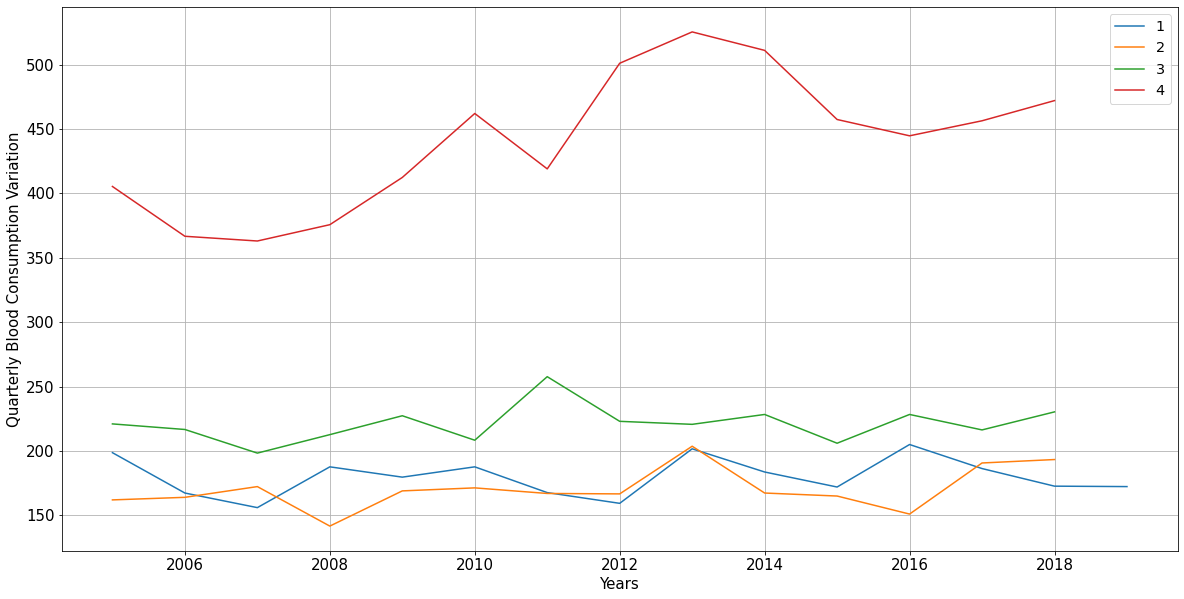

In [34]:
quarterly_BloodC.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

plt.xlabel('Years',fontsize=15)
plt.ylabel('Quarterly Blood Consumption Variation',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.legend(fontsize="x-large")

## As seen from the above plot, Q4 has the highest consumption. After that Q3. Q2 and Q1 have lowest consumption. Difference between highest and lowest value is quite wide.

## Plotting the time series monthplot to understand the spread of Consumption across different years and within different months across years.

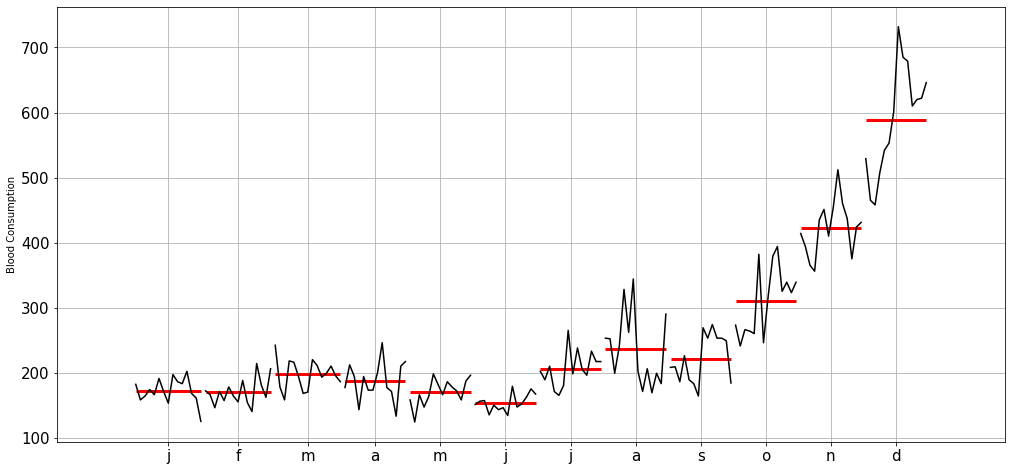

In [35]:
from pylab import rcParams

rcParams['figure.figsize'] =17,8

from statsmodels.graphics.tsaplots import month_plot
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
month_plot(df_sub['Blood_group_A-'],ylabel='Blood Consumption')
plt.grid();

	For most of the months consumption for a month is almost constant over the years till July.

	Consumption is highest for the month of December


## Plotting the Empirical Cumulative Distribution.

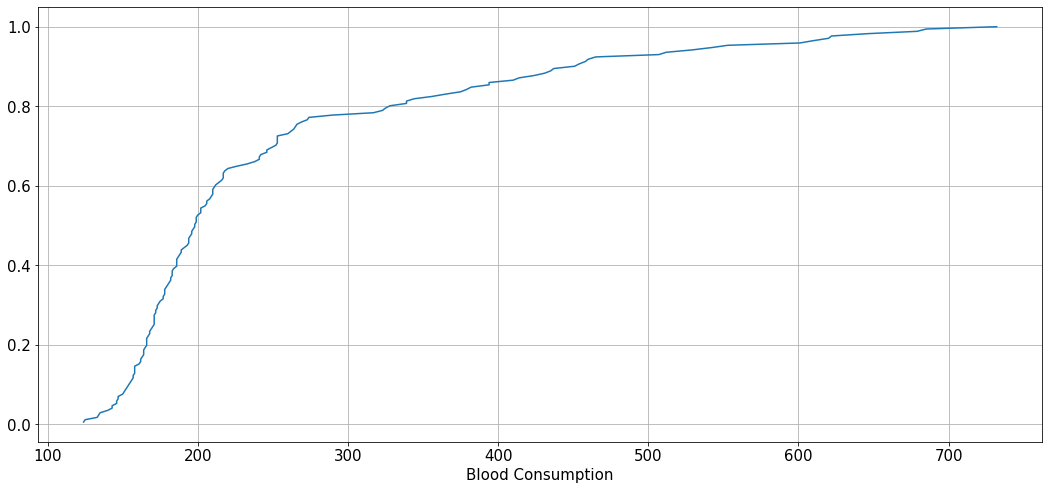

In [36]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_sub['Blood_group_A-'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Blood Consumption', fontsize = 15);

	Around 60% of all the months had 200 unit or lesser consumption

	Around 90% of all the months had 400 unit or lesser consumption


## Plot the average consumption per month and the month on month percentage change of consumption.

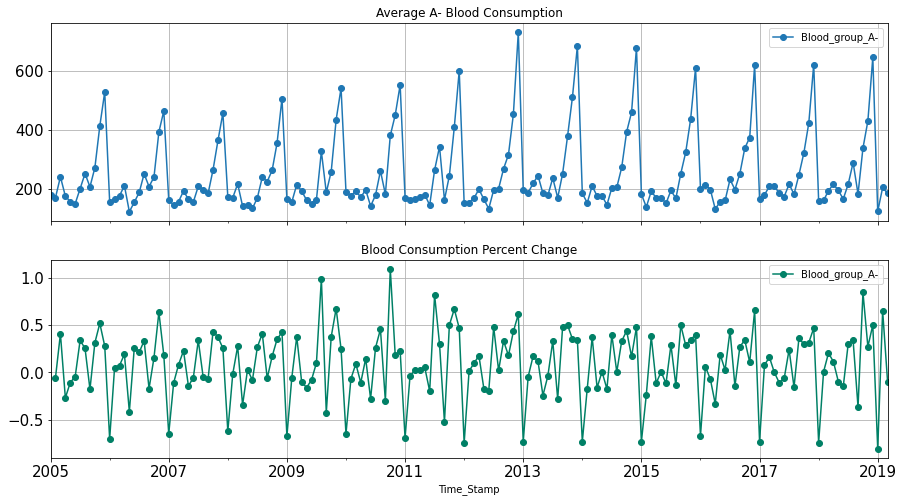

In [37]:
# group by date and get average Customers, and precent change
average    = df_sub.groupby(df_sub.index)["Blood_group_A-"].mean()
pct_change = df_sub.groupby(df_sub.index)["Blood_group_A-"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))


ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average A- Blood Consumption",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())

ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Blood Consumption Percent Change",grid=True)

There is huge percentage change in Consumption from December to January.Definitely need to analyse this change because the same could be realted to spread of some specific disease because of the change in environmental condition.

## Plot Blood Consumption for every year

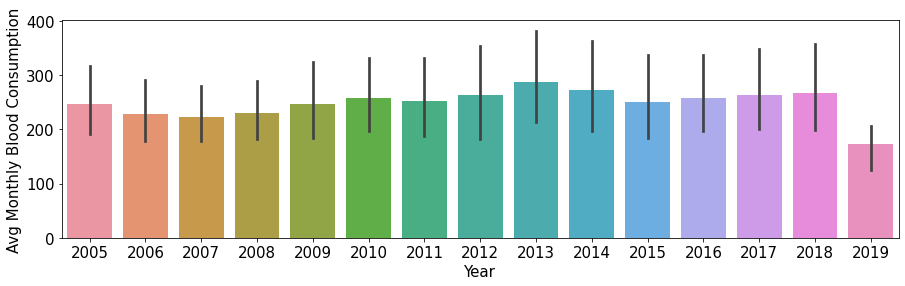

In [38]:
## Plot consumption for every year
fig, (axis1) = plt.subplots(1,figsize=(15,4))

sns.barplot(x=df_sub.index.year, y=df_sub.values[:,0], data=df_sub, ax=axis1);
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.xlabel('Year', fontsize = 15);
plt.ylabel('Avg Monthly Blood Consumption', fontsize = 15);

It can be seen that, the average monthly consumption is almost constant except for the year 2013 which should a peak.

## Yearly Total Blood Consumption

In [39]:
monthly_BloodC_across_years = pd.pivot_table(df_sub, values = "Blood_group_A-", columns = df_sub.index.month_name(), index = df_sub.index.year)
yearly_total_BloodC = monthly_BloodC_across_years.sum(axis = 1) 
yearly_total_BloodC


Time_Stamp
2005    2961.0
2006    2744.0
2007    2669.0
2008    2753.0
2009    2965.0
2010    3088.0
2011    3034.0
2012    3150.0
2013    3454.0
2014    3271.0
2015    3001.0
2016    3087.0
2017    3149.0
2018    3205.0
2019     517.0
dtype: float64

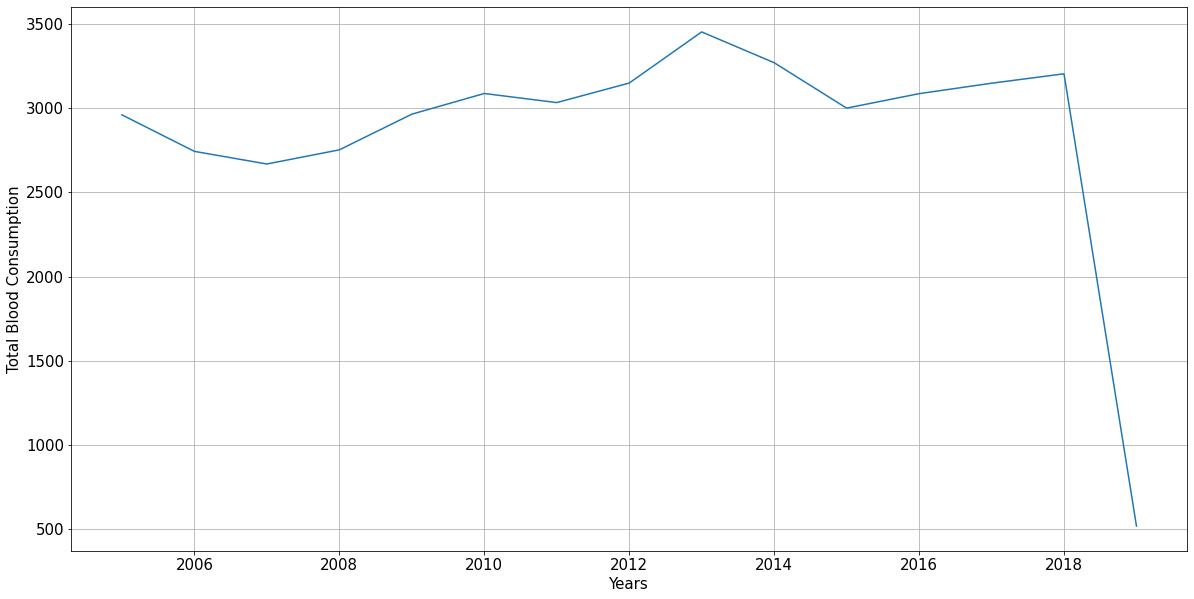

In [40]:
yearly_total_BloodC.plot(figsize=(20,10))
plt.grid()

plt.xlabel('Years',fontsize=15)
plt.ylabel('Total Blood Consumption',fontsize=15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)


As it can be seen that total blood consumption shows a slight variation. Initially there was a slight dip in year 2007 but then it picked up with a high value in 2010 and then showing a dip in 2011 before reaching the highest value in 2013.

Dip in 2019 is because we have a data only for 3 months - pre covid scenario.


## Decompose the Time Series and plot the different components.

### Assuming additive decomposition

In [41]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

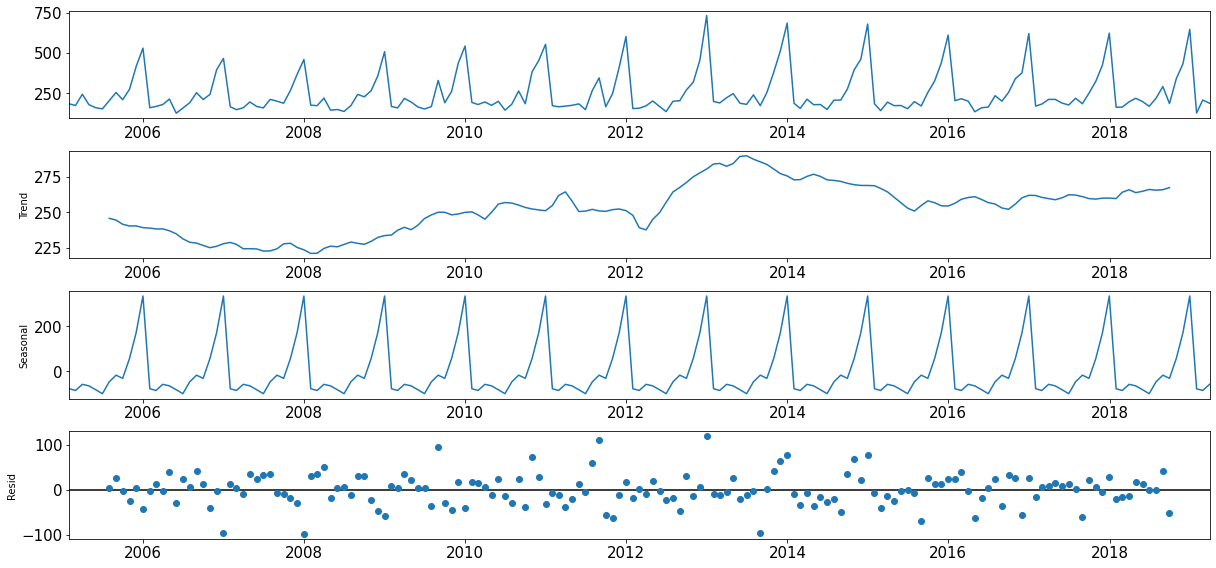

In [42]:
decomposition = seasonal_decompose(df_sub,model='additive')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16


### Assuming multiplicative decomposition

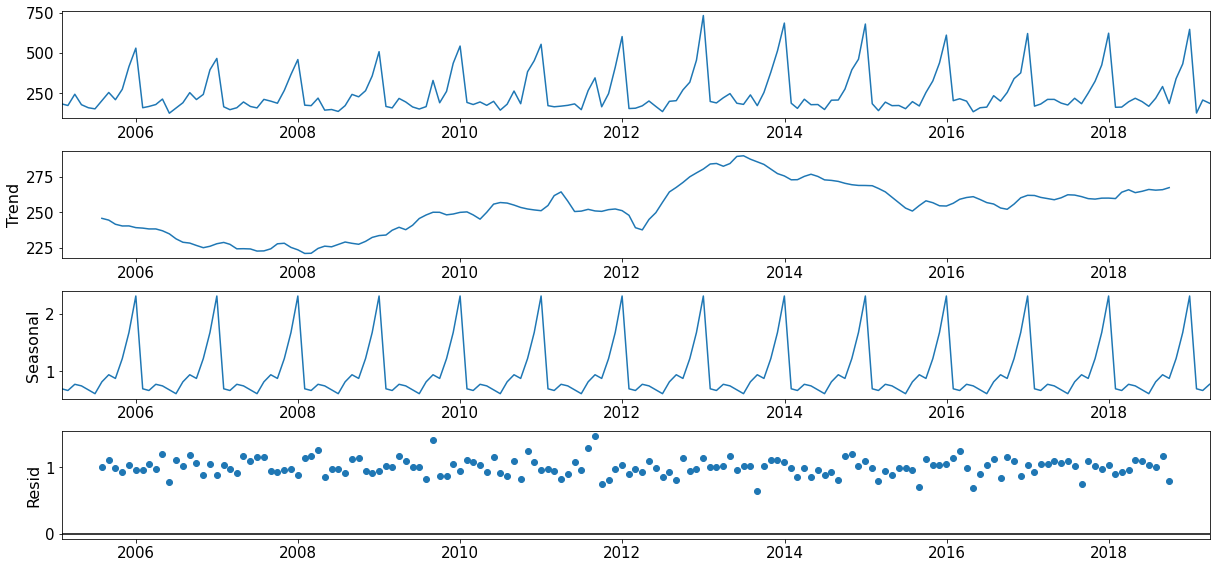

In [43]:
decomposition = seasonal_decompose(df_sub,model='multiplicative')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16

In both multiplicative and additive model, We observe that the trend and seasonality are clearly separated and scale of noise is small. As there was no change which was observed in the noise level between two graphs, assumption is that series is additive in nature

In [44]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2005-01-31           NaN
2005-02-28           NaN
2005-03-31           NaN
2005-04-30           NaN
2005-05-31           NaN
2005-06-30           NaN
2005-07-31    245.750000
2005-08-31    244.500000
2005-09-30    241.583333
2005-10-31    240.375000
2005-11-30    240.416667
2005-12-31    239.208333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2005-01-31    0.694943
2005-02-28    0.665450
2005-03-31    0.773106
2005-04-30    0.745614
2005-05-31    0.676301
2005-06-30    0.609879
2005-07-31    0.815972
2005-08-31    0.939141
2005-09-30    0.875475
2005-10-31    1.220548
2005-11-30    1.674458
2005-12-31    2.309112
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2005-01-31         NaN
2005-02-28         NaN
2005-03-31         NaN
2005-04-30         NaN
2005-05-31         NaN
2005-06-30         NaN
2005-07-31    1.007355
2005-08-31    1.101821
2005-09-30    0.983451
2005-10-31    0.930504
2005-11-30    1.028399
2005-12-31    0.957711
Name: resid, dtype:

Because of limitation of python, first 6 months data is not visible for a monthly series.

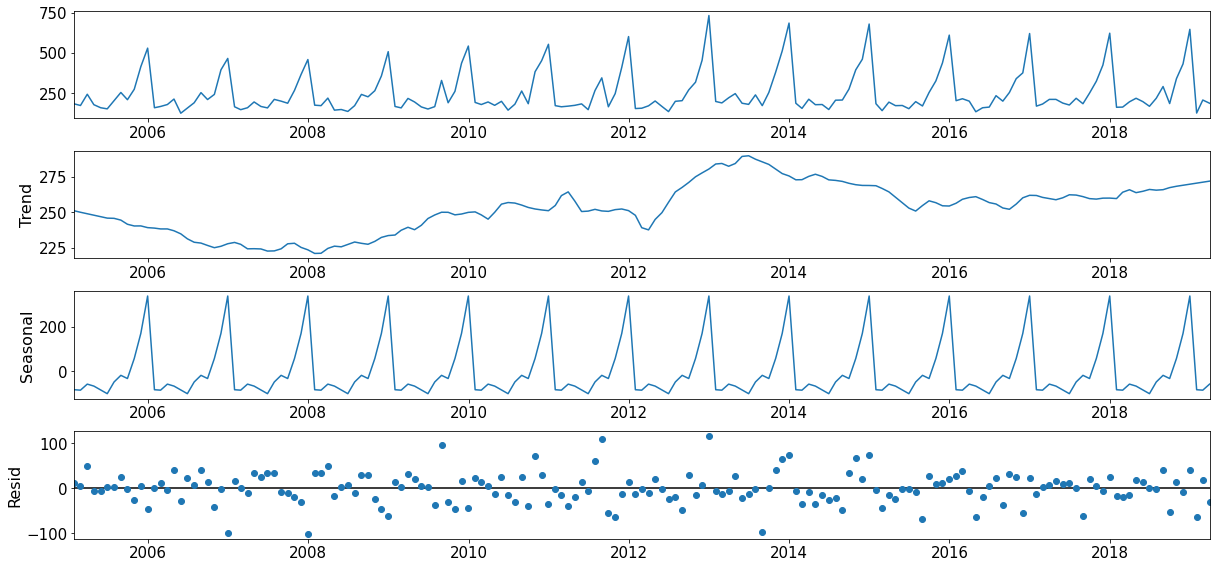

In [45]:
decomposition = seasonal_decompose(df_sub,model='additive',extrapolate_trend='freq')
decomposition.plot();
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16


In [46]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
2005-01-31    251.058372
2005-02-28    250.027632
2005-03-31    248.996892
2005-04-30    247.966152
2005-05-31    246.935412
2005-06-30    245.904672
2005-07-31    245.750000
2005-08-31    244.500000
2005-09-30    241.583333
2005-10-31    240.375000
2005-11-30    240.416667
2005-12-31    239.208333
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
2005-01-31    -81.330473
2005-02-28    -83.254433
2005-03-31    -56.336728
2005-04-30    -65.129430
2005-05-31    -82.374258
2005-06-30    -98.913729
2005-07-31    -46.866967
2005-08-31    -17.298515
2005-09-30    -31.447324
2005-10-31     57.648725
2005-11-30    169.507762
2005-12-31    335.795370
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
2005-01-31    12.272100
2005-02-28     5.226801
2005-03-31    49.339836
2005-04-30    -5.836721
2005-05-31    -6.561153
2005-06-30     4.009058
2005-07-31     3.116967
2005-08-31    25.798515
2005-09-30    -2.136009
2005-10-31   -25.023725
2005-11-30     4.075571
2005-12